In [1]:
import cv2
import sys
import numpy as np
import os

import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo, display, HTML, Image, Video

opencv_path = "opencv/samples/data/"
opencvxtra_path = "opencv_extra/testdata/dnn/"

In [4]:
road = cv2.imread('2701_2024-10-12_12-48-57.jpg')

p1 = np.float32([[1916,282], [1845,249], [1594,374], [1653,424]])
p2 = np.float32([[1916,282], [1916,232], [1584,232], [1584,282]])

M = cv2.getPerspectiveTransform(p1,p2)
dst = cv2.warpPerspective(road, M, (5000, 5000),flags=cv2.INTER_LINEAR)

p = np.array([[1916,282], [1845,249], [1594,374], [1653,424]], np.int32)
p = p.reshape((-1,1,2))
i2 = cv2.polylines(road, [p], True, (255, 0, 0), 3 )

Second subplot saved.


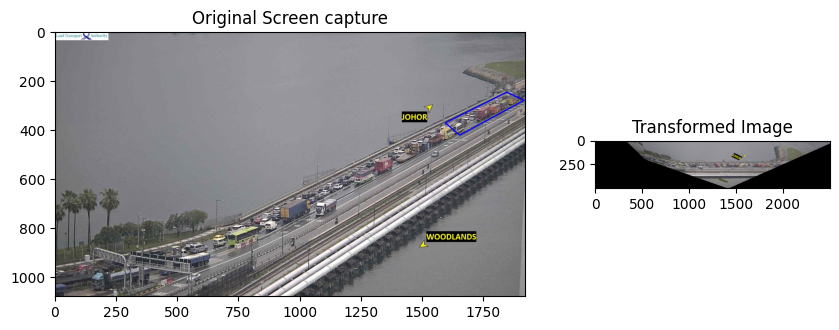

In [6]:
fig = plt.figure(figsize=(10, 5)) 
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1]) 

# First subplot
ax1 = fig.add_subplot(gs[0])
ax1.imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Screen capture')

# Second subplot
ax2 = fig.add_subplot(gs[1])
ax2.imshow(cv2.cvtColor(dst[:500, :2500], cv2.COLOR_BGR2RGB))
ax2.set_title('Transformed Image');

extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax2_transformed_image.png', bbox_inches=extent)
print("Second subplot saved.")